## Load Top Basement Model  
Reference: https://gdr.openei.org/submissions/1107

## 📘 Summary of the Notebook

1. **Data Loading**  
   - Imports the Top Basement CSV into a pandas DataFrame.

2. **Data Preparation**  
   - Cleans and renames columns (Easting, Northing, Elevation, Basin/Granitoid).  
   - Ensures numeric types and removes any unwanted columns.

3. **Elevation Slicing**  
   - Defines a list of target elevation levels.  
   - For each level:  
     - Filters points within a specified tolerance (±max_diff).  
     - Selects the single point closest to the target elevation for each (Easting, Northing) pair.  
     - Stores each slice in a dictionary and writes it out as a CSV.

4. **Visualization**  
   - Creates a figure with subplots arranged by elevation slice.  
   - Plots each slice’s points colored by Basin vs. Granitoid classification.  
   - Adds grid lines, axis labels, a unified legend in the top right corner and a single color bar below all subplots.

---

## 🎯 Objective

Automate the extraction, filtering and multi‐slice visualization of top‐of‐basement classification data at discrete elevation levels to streamline geological mapping and interpretation.  


In [2]:
import pandas as pd

# CSV file path
csv_path = "/home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/top_basement/top_of_basement_data.csv"

# Try reading the CSV with different separators (tab, comma, space)
try:
    top_basement = pd.read_csv(csv_path, sep=None, engine='python')  # Detecta automaticamente o separador
except Exception as e:
    print(f"Erro ao ler o CSV: {e}")
    exit()

# Display detected columns
print("📌 Colunas detectadas no arquivo CSV:")
print(top_basement.columns)

# Ensure column names are correct (removing extra spaces)
top_basement.columns = top_basement.columns.str.strip()

# Remove the "Data" column if it exists
if "Data" in top_basement.columns:
    top_basement.drop(columns=["Data"], inplace=True)

# Rename columns
rename_dict = {"X": "Easting[m]", "Y": "Northing[m]", "Z": "Elevation[m]"}
top_basement.rename(columns=rename_dict, inplace=True)

📌 Colunas detectadas no arquivo CSV:
Index(['X', 'Y', 'Z', 'Data'], dtype='object')


In [3]:
print(top_basement)

        Easting[m]  Northing[m]  Elevation[m]
0         329950.0    4270950.0  -2041.057251
1         329950.0    4270900.0  -2042.902588
2         330000.0    4270900.0  -2026.215210
3         330000.0    4270950.0  -2022.096558
4         330050.0    4270900.0  -2009.527832
...            ...          ...           ...
103450    343950.0    4252850.0   2514.253418
103451    344000.0    4252850.0   2504.438965
103452    344050.0    4252850.0   2476.717773
103453    344100.0    4252850.0   2439.737305
103454    344150.0    4252850.0   2415.192871

[103455 rows x 3 columns]


In [5]:
import pandas as pd
import os

def filter_and_save_top_basement(df, target_elevations, max_diff=50, save_dir="./"):
    """
    Filtra o DataFrame `top_basement` para encontrar os valores mais próximos das cotas desejadas
    e salva os resultados como CSVs. Remove duplicatas de coordenadas (Easting[m], Northing[m]).

    Args:
    - df (pd.DataFrame): DataFrame contendo os dados de elevação.
    - target_elevations (list): Lista de cotas-alvo para filtrar os dados.
    - max_diff (float): Diferença máxima permitida entre Elevation[m] e a cota-alvo.
    - save_dir (str): Diretório onde os arquivos CSV serão salvos.

    Returns:
    - dict: Dicionário de DataFrames filtrados.
    """

    # Create directory if it does not exist
    os.makedirs(save_dir, exist_ok=True)

    # Dictionary to store filtered DataFrames
    filtered_dfs = {}

    for elevation in target_elevations:
        # Filter data within ±max_diff of the target elevation
        df_filtered = df[(df['Elevation[m]'] >= elevation - max_diff) & 
                         (df['Elevation[m]'] <= elevation + max_diff)].copy()
        
        if df_filtered.empty:
            print(f"⚠️ Nenhum dado encontrado na faixa de ±{max_diff}m de {elevation}m.")
            continue

        # Select the row with the smallest difference for each (Easting, Northing) pair
        df_filtered["diff"] = (df_filtered["Elevation[m]"] - elevation).abs()
        df_filtered = df_filtered.sort_values("diff").drop_duplicates(subset=["Easting[m]", "Northing[m]"], keep="first")
        df_filtered.drop(columns=["diff"], inplace=True)

        # Create DataFrame and CSV file name
        elevation_str = f"minus{abs(elevation)}" if elevation < 0 else f"{elevation}"
        df_name = f"top_basement_{elevation_str}m"
        filename = f"{df_name}.csv"
        file_path = os.path.join(save_dir, filename)

        # Save CSV file
        df_filtered.to_csv(file_path, index=False, float_format="%.3f")
        print(f"📂 Arquivo salvo: {file_path}")

        # Store DataFrame in a dictionary
        globals()[df_name] = df_filtered  # Criar variável global com o DataFrame
        filtered_dfs[df_name] = df_filtered

    return filtered_dfs

# **✅ Usage Example**
target_elevations = [1500, 1000, 500, 0, -500, -1000]
save_directory = "/home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/top_basement"

filtered_basement_dfs = filter_and_save_top_basement(top_basement, target_elevations, max_diff=10, save_dir=save_directory)


📂 Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/top_basement/top_basement_1500m.csv
📂 Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/top_basement/top_basement_1000m.csv
📂 Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/top_basement/top_basement_500m.csv
📂 Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/top_basement/top_basement_0m.csv
📂 Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/top_basement/top_basement_minus500m.csv
📂 Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/top_basement/top_basement_minus1000m.csv


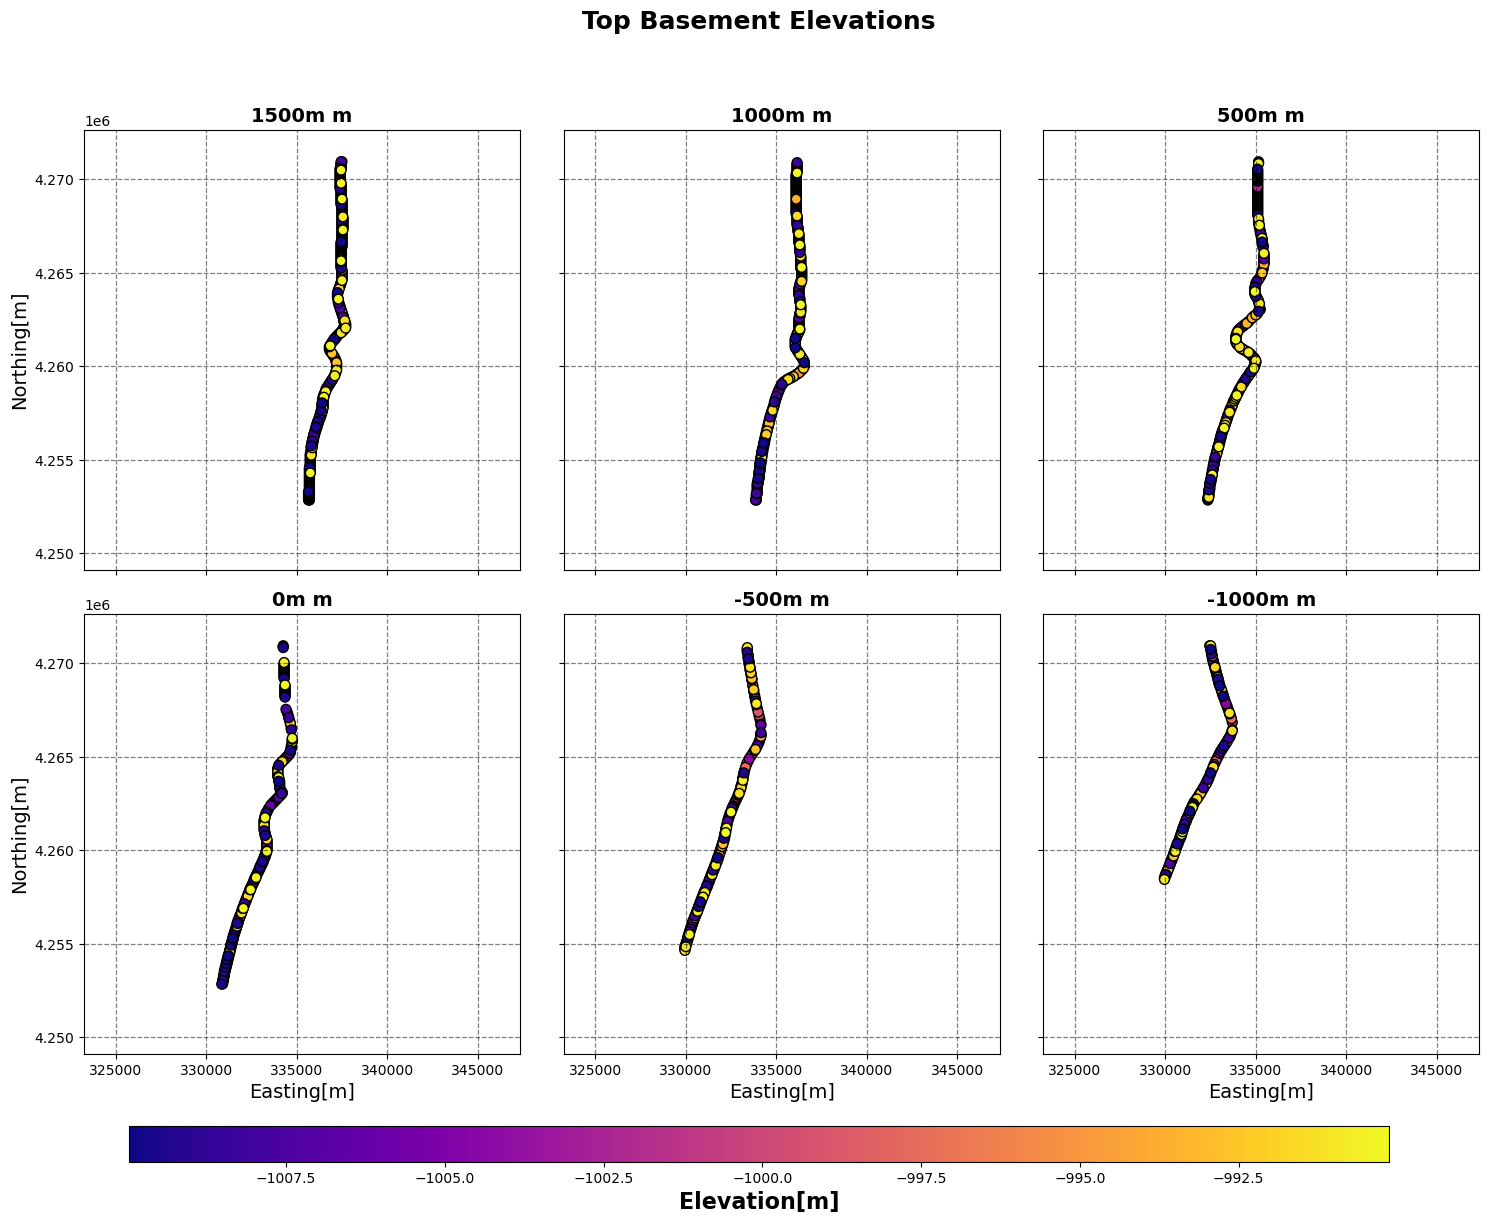

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_basement_subplots(dataframes, font_size=12, cmap_choice="viridis", subplot_spacing=0.3, 
                               grid_color="gray", grid_alpha=0.3):
    """
    Plota múltiplos DataFrames contendo dados de topografia do basement em diferentes elevações como subplots.

    Args:
    - dataframes (dict): Dicionário de DataFrames, onde as chaves são os nomes dos DataFrames e os valores são os DataFrames em si.
    - font_size (int): Tamanho da fonte para rótulos e títulos.
    - cmap_choice (str): Nome do colormap a ser usado.
    - subplot_spacing (float): Espaçamento entre os subplots.
    - grid_color (str): Cor do grid nos subplots.
    - grid_alpha (float): Transparência do grid nos subplots.

    Returns:
    - Exibe um gráfico com subplots representando os diferentes DataFrames.
    """

    # Define the correct order of elevations for the subplots
    elevations = ["1500m", "1000m", "500m", "0m", "minus500m", "minus1000m"]
    
    # Create figure with 2 rows and 3 columns for subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
    fig.suptitle("Top Basement Elevations", fontsize=font_size + 4, fontweight='bold')

    # Set global limits for plots
    northing_min, northing_max = 4249124.46, 4272661.41
    easting_min, easting_max = 323248.37, 347342.93

    # Create subplots for each DataFrame
    for i, (ax, elev) in enumerate(zip(axes.flatten(), elevations)):
        df_name = f"top_basement_{elev}"
        if df_name in dataframes:  # Verifica se o DataFrame existe
            df = dataframes[df_name]
            sc = ax.scatter(df["Easting[m]"], df["Northing[m]"], c=df["Elevation[m]"], 
                            cmap=cmap_choice, s=50, edgecolor="black")  # Sem normalização!
            ax.set_title(f"{elev.replace('minus', '-')} m", fontsize=font_size, fontweight='bold')

            # Apply grid to subplots
            ax.grid(True, linestyle="--", linewidth=0.9, color=grid_color, alpha=grid_alpha)

            # Set global limits
            ax.set_xlim(easting_min, easting_max)
            ax.set_ylim(northing_min, northing_max)

            # Set axis labels only where necessary
            if i % 3 == 0:  # Primeira coluna
                ax.set_ylabel("Northing[m]", fontsize=font_size)
            if i >= 3:  # Última linha (índices 3, 4, 5)
                ax.set_xlabel("Easting[m]", fontsize=font_size)

    # Add a single color bar below all subplots (without normalization!)
    cbar_ax = fig.add_axes([0.15, 0.02, 0.7, 0.03])
    cbar = plt.colorbar(sc, cax=cbar_ax, orientation='horizontal')
    cbar.set_label("Elevation[m]", fontsize=font_size + 2, fontweight='bold')

    plt.subplots_adjust(hspace=subplot_spacing, wspace=subplot_spacing)  # Ajustar espaçamento dos subplots
    plt.show()


# **✅ Usage Example**
dataframes_dict = {
    "top_basement_1500m": top_basement_1500m,
    "top_basement_1000m": top_basement_1000m,
    "top_basement_500m": top_basement_500m,
    "top_basement_0m": top_basement_0m,
    "top_basement_minus500m": top_basement_minus500m,
    "top_basement_minus1000m": top_basement_minus1000m,
}

# Plot subplots
plot_top_basement_subplots(dataframes_dict, font_size=14, cmap_choice="plasma", subplot_spacing=0.1, grid_color="black", grid_alpha=0.5)


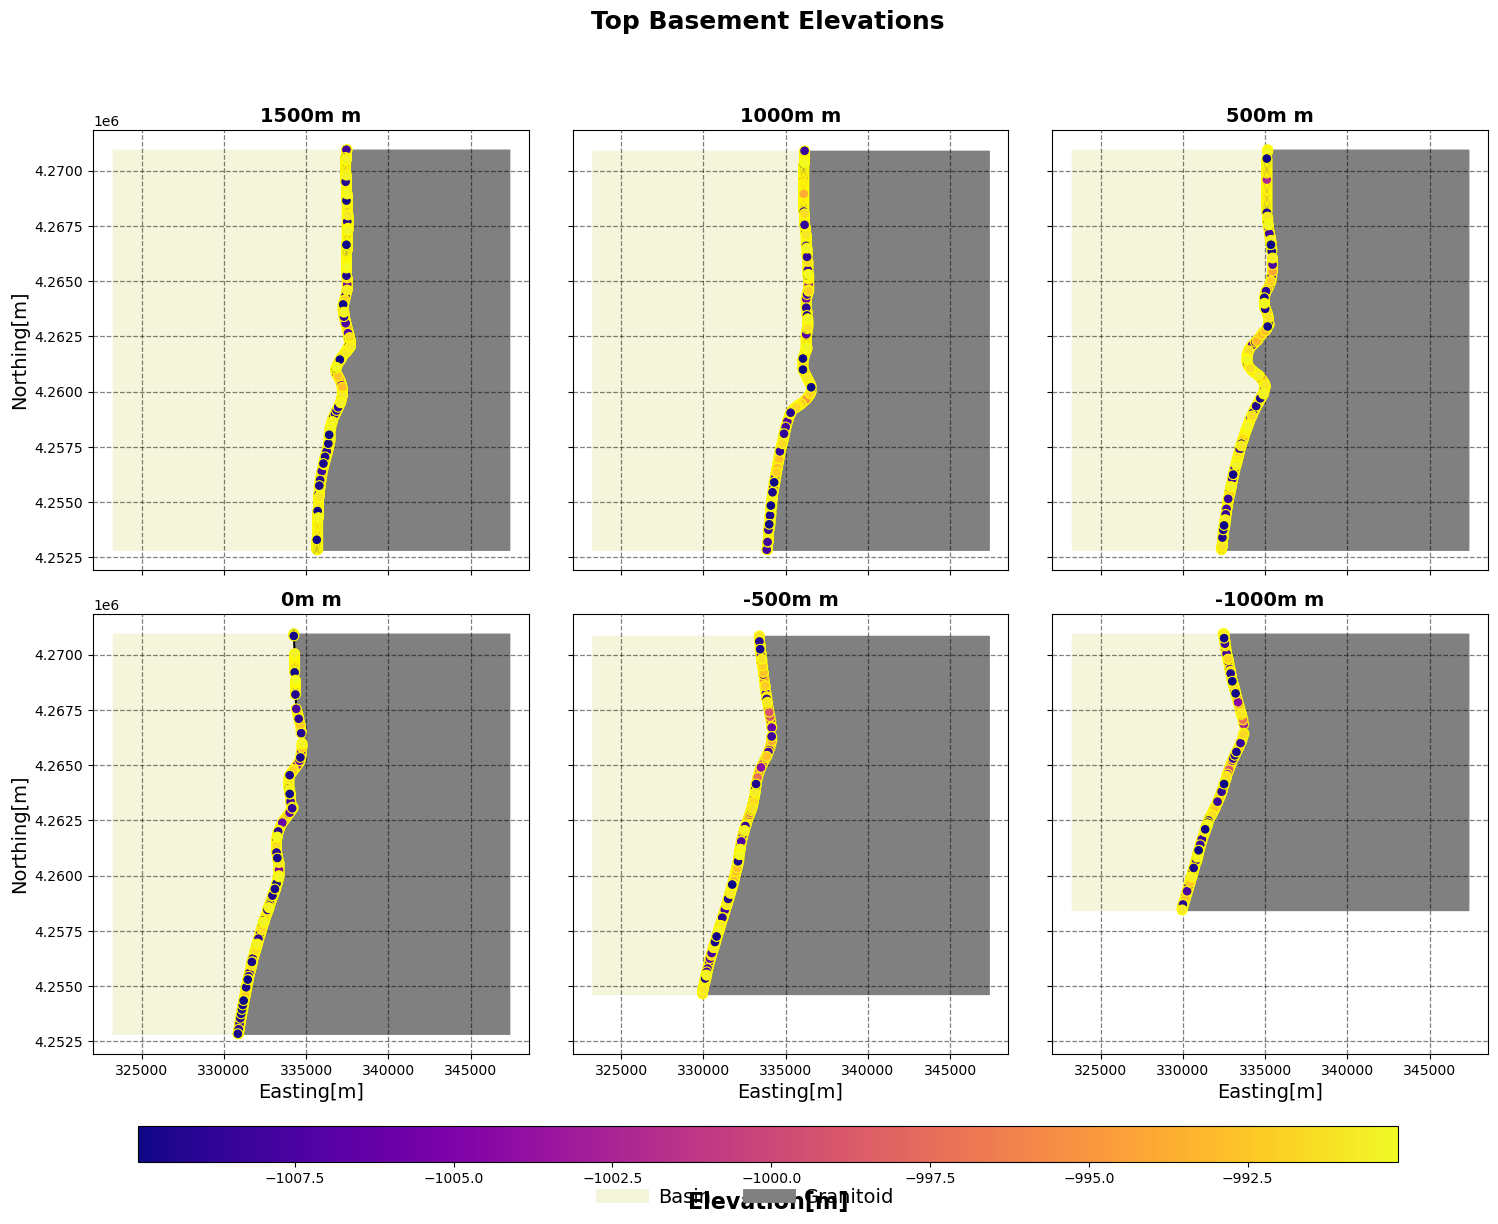

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_basement_subplots_with_background(dataframes, font_size=12, cmap_choice="plasma", subplot_spacing=0.3,
                                              grid_color="gray", grid_alpha=0.3):
    """
    Plota múltiplos DataFrames contendo dados de top basement em diferentes elevações como subplots.
    Adiciona uma linha que acompanha os pontos e usa essa linha para preencher a esquerda com bege (Basin)
    e a direita com cinza (Granitoid).

    Args:
    - dataframes (dict): Dicionário de DataFrames, onde as chaves são os nomes dos DataFrames e os valores são os DataFrames em si.
    - font_size (int): Tamanho da fonte para rótulos e títulos.
    - cmap_choice (str): Nome do colormap a ser usado.
    - subplot_spacing (float): Espaçamento entre os subplots.
    - grid_color (str): Cor do grid nos subplots.
    - grid_alpha (float): Transparência do grid nos subplots.

    Returns:
    - Exibe um gráfico com subplots representando os diferentes DataFrames.
    """

    # Define the correct order of elevations for the subplots
    elevations = ["1500m", "1000m", "500m", "0m", "minus500m", "minus1000m"]
    
    # Create figure with 2 rows and 3 columns for subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
    fig.suptitle("Top Basement Elevations", fontsize=font_size + 4, fontweight='bold')

    # Determine global axis limits
    x_min, x_max = 323248.37, 347342.93
    y_min, y_max = 4249124.46, 4272661.41

    # Create subplots for each DataFrame
    for i, (ax, elev) in enumerate(zip(axes.flatten(), elevations)):
        df_name = f"top_basement_{elev}"
        if df_name in dataframes:  # Verifica se o DataFrame existe
            df = dataframes[df_name]

            # Sort points by Northing[m] coordinate to draw the line correctly
            df_sorted = df.sort_values("Northing[m]")

            # Create guide line connecting the points
            ax.plot(df_sorted["Easting[m]"], df_sorted["Northing[m]"], color="black", linewidth=1.5, zorder=1)

            # Create fill areas based on the separation line
            ax.fill_betweenx(df_sorted["Northing[m]"], x_min, df_sorted["Easting[m]"], color="beige", label="Basin", zorder=0)
            ax.fill_betweenx(df_sorted["Northing[m]"], df_sorted["Easting[m]"], x_max, color="gray", label="Granitoid", zorder=0)

            # Plot elevation points
            sc = ax.scatter(df["Easting[m]"], df["Northing[m]"], c=df["Elevation[m]"], cmap=cmap_choice, s=50,
                            edgecolor="yellow", linewidth=0.8, zorder=2)
            ax.set_title(f"{elev.replace('minus', '-')} m", fontsize=font_size, fontweight='bold')

            # Apply grid to subplots
            ax.grid(True, linestyle="--", linewidth=0.9, color=grid_color, alpha=grid_alpha)

            # Set axis labels only where necessary
            if i % 3 == 0:  # Primeira coluna
                ax.set_ylabel("Northing[m]", fontsize=font_size)
            if i >= 3:  # Última linha (índices 3, 4, 5)
                ax.set_xlabel("Easting[m]", fontsize=font_size)

    # Add a single color bar below all subplots
    cbar_ax = fig.add_axes([0.15, 0.02, 0.7, 0.03])
    cbar = plt.colorbar(sc, cax=cbar_ax, orientation='horizontal')
    cbar.set_label("Elevation[m]", fontsize=font_size + 2, fontweight='bold')

    # Add global legend for Basin/Granitoid separation
    handles = [plt.Line2D([0], [0], color="beige", lw=10, label="Basin"),
               plt.Line2D([0], [0], color="gray", lw=10, label="Granitoid")]
    fig.legend(handles=handles, loc="lower center", fontsize=font_size, ncol=2, frameon=False)

    plt.subplots_adjust(hspace=subplot_spacing, wspace=subplot_spacing)  # Ajustar espaçamento dos subplots
    plt.show()


# **✅ Usage Example**
dataframes_dict = {
    "top_basement_1500m": top_basement_1500m,
    "top_basement_1000m": top_basement_1000m,
    "top_basement_500m": top_basement_500m,
    "top_basement_0m": top_basement_0m,
    "top_basement_minus500m": top_basement_minus500m,
    "top_basement_minus1000m": top_basement_minus1000m,
}

plot_top_basement_subplots_with_background(dataframes_dict, font_size=14, cmap_choice="plasma", subplot_spacing=0.1, grid_color="black", grid_alpha=0.5)


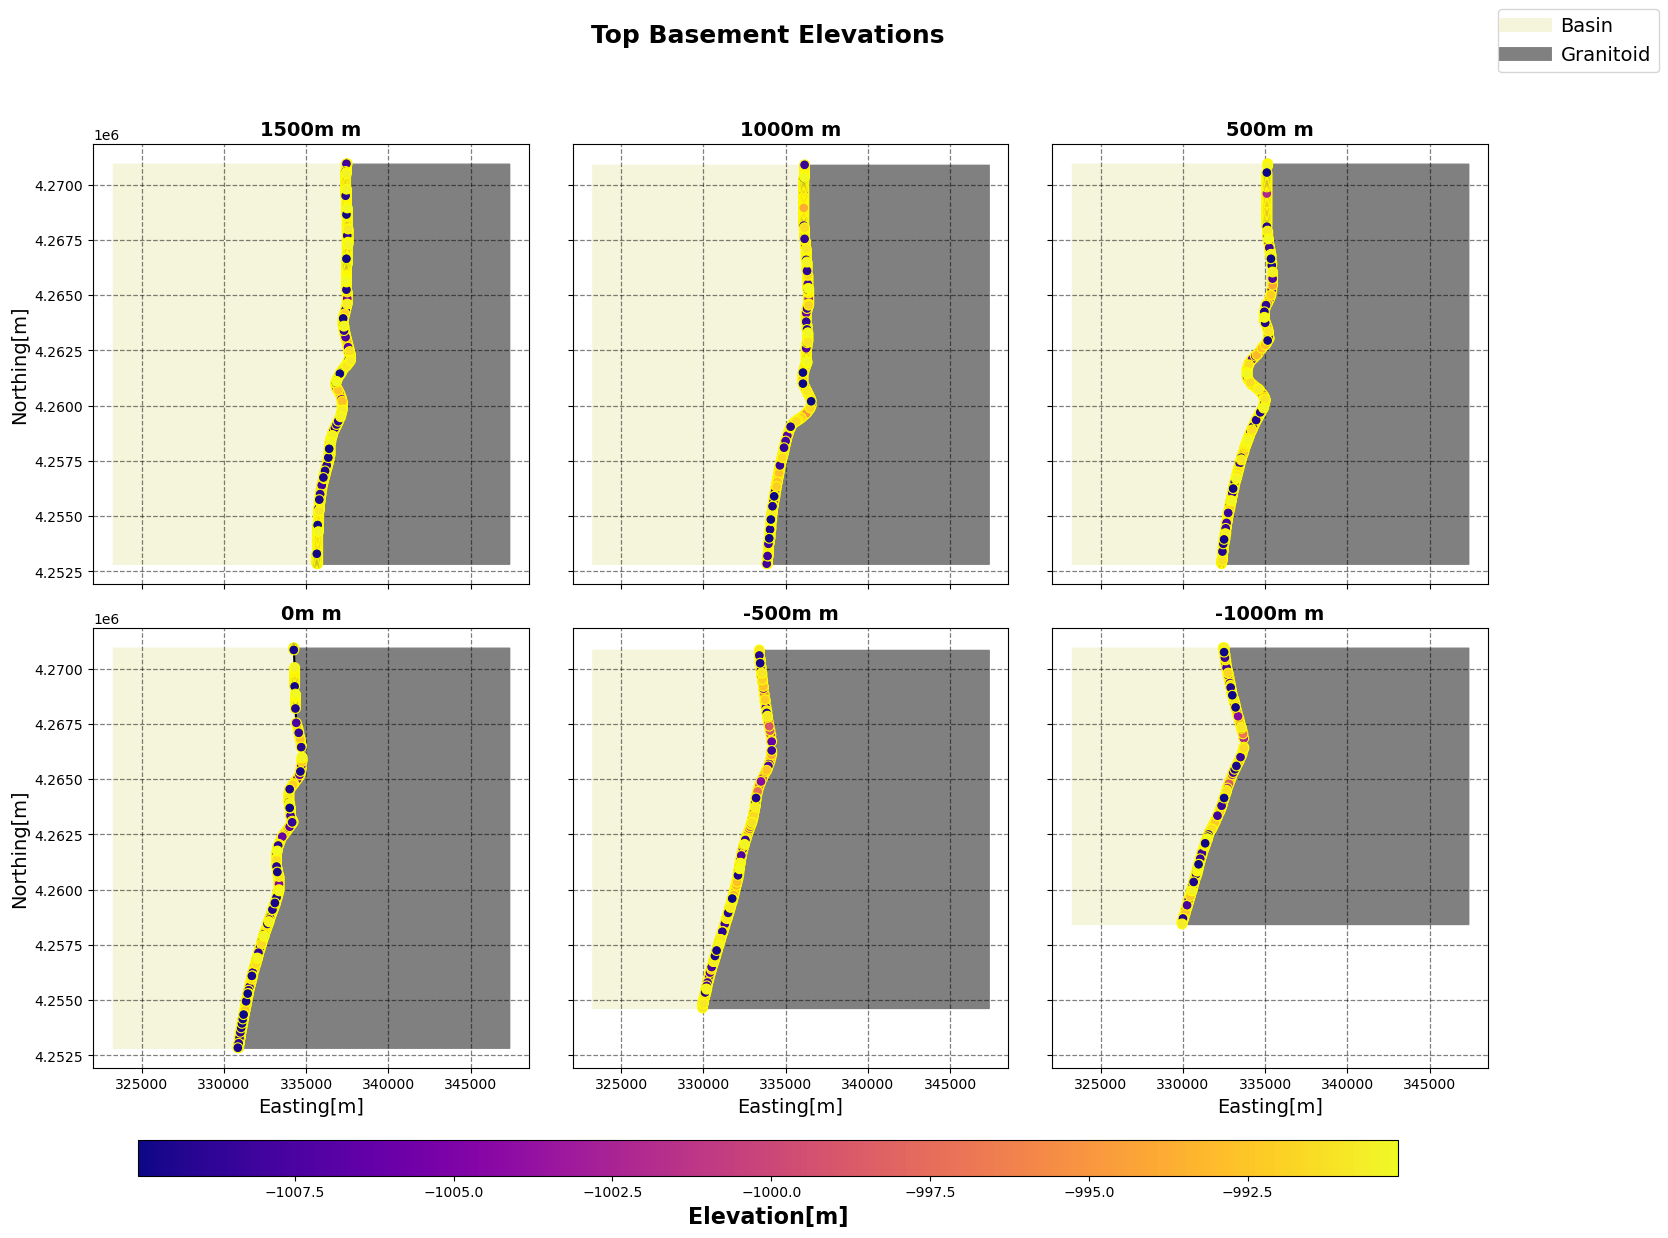

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_basement_subplots_with_background(dataframes, font_size=12, cmap_choice="plasma", subplot_spacing=0.3,
                                              grid_color="gray", grid_alpha=0.3):
    """
    Plota múltiplos DataFrames contendo dados de top basement em diferentes elevações como subplots.
    Adiciona uma linha que acompanha os pontos e usa essa linha para preencher a esquerda com bege (Basin)
    e a direita com cinza (Granitoid).

    Args:
    - dataframes (dict): Dicionário de DataFrames, onde as chaves são os nomes dos DataFrames e os valores são os DataFrames em si.
    - font_size (int): Tamanho da fonte para rótulos e títulos.
    - cmap_choice (str): Nome do colormap a ser usado.
    - subplot_spacing (float): Espaçamento entre os subplots.
    - grid_color (str): Cor do grid nos subplots.
    - grid_alpha (float): Transparência do grid nos subplots.

    Returns:
    - Exibe um gráfico com subplots representando os diferentes DataFrames.
    """

    # Define the correct order of elevations for the subplots
    elevations = ["1500m", "1000m", "500m", "0m", "minus500m", "minus1000m"]
    
    # Create figure with 2 rows and 3 columns for subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
    fig.suptitle("Top Basement Elevations", fontsize=font_size + 4, fontweight='bold')

    # Determine global axis limits
    x_min, x_max = 323248.37, 347342.93
    y_min, y_max = 4249124.46, 4272661.41

    # Create subplots for each DataFrame
    for i, (ax, elev) in enumerate(zip(axes.flatten(), elevations)):
        df_name = f"top_basement_{elev}"
        if df_name in dataframes:  # Verifica se o DataFrame existe
            df = dataframes[df_name]

            # Sort points by Northing[m] coordinate to draw the line correctly
            df_sorted = df.sort_values("Northing[m]")

            # Create guide line connecting the points
            ax.plot(df_sorted["Easting[m]"], df_sorted["Northing[m]"], color="black", linewidth=1.5, zorder=1)

            # Create fill areas based on the separation line
            ax.fill_betweenx(df_sorted["Northing[m]"], x_min, df_sorted["Easting[m]"], color="beige", label="Basin", zorder=0)
            ax.fill_betweenx(df_sorted["Northing[m]"], df_sorted["Easting[m]"], x_max, color="gray", label="Granitoid", zorder=0)

            # Plot elevation points
            sc = ax.scatter(df["Easting[m]"], df["Northing[m]"], c=df["Elevation[m]"], cmap=cmap_choice, s=50,
                            edgecolor="yellow", linewidth=0.8, zorder=2)
            ax.set_title(f"{elev.replace('minus', '-')} m", fontsize=font_size, fontweight='bold')

            # Apply grid to subplots
            ax.grid(True, linestyle="--", linewidth=0.9, color=grid_color, alpha=grid_alpha)

            # Set axis labels only where necessary
            if i % 3 == 0:  # Primeira coluna
                ax.set_ylabel("Northing[m]", fontsize=font_size)
            if i >= 3:  # Última linha (índices 3, 4, 5)
                ax.set_xlabel("Easting[m]", fontsize=font_size)

    # Add a single color bar below all subplots
    cbar_ax = fig.add_axes([0.15, 0.02, 0.7, 0.03])
    cbar = plt.colorbar(sc, cax=cbar_ax, orientation='horizontal')
    cbar.set_label("Elevation[m]", fontsize=font_size + 2, fontweight='bold')

    # Add global legend for Basin/Granitoid separation in the top right
    handles = [plt.Line2D([0], [0], color="beige", lw=10, label="Basin"),
               plt.Line2D([0], [0], color="gray", lw=10, label="Granitoid")]
    fig.legend(handles=handles, loc="upper right", fontsize=font_size, frameon=True)

    plt.subplots_adjust(hspace=subplot_spacing, wspace=subplot_spacing)  # Ajustar espaçamento dos subplots
    plt.show()

# **✅ Usage Example**
dataframes_dict = {
    "top_basement_1500m": top_basement_1500m,
    "top_basement_1000m": top_basement_1000m,
    "top_basement_500m": top_basement_500m,
    "top_basement_0m": top_basement_0m,
    "top_basement_minus500m": top_basement_minus500m,
    "top_basement_minus1000m": top_basement_minus1000m,
}

plot_top_basement_subplots_with_background(dataframes_dict, font_size=14, cmap_choice="plasma", subplot_spacing=0.1, grid_color="black", grid_alpha=0.5)


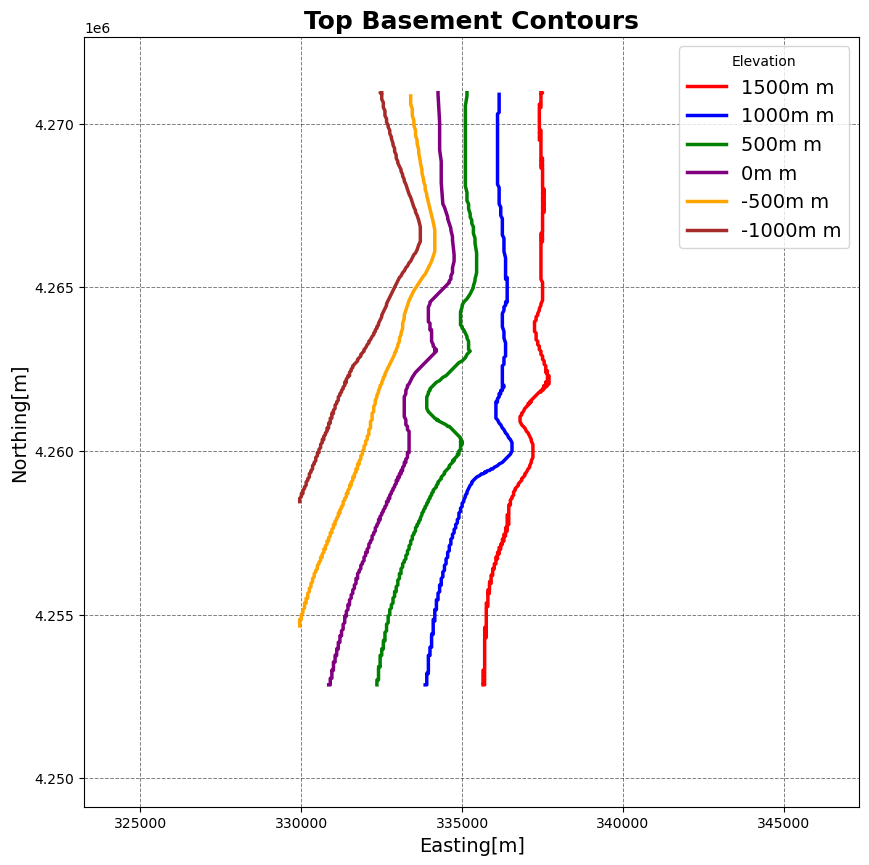

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_basement_contours(dataframes, font_size=12, line_width=2, grid_color="gray", grid_alpha=0.3):
    """
    Plota um único gráfico contendo as linhas contornando os pontos de diferentes elevações do top basement.

    Args:
    - dataframes (dict): Dicionário contendo os DataFrames das diferentes elevações do top basement.
    - font_size (int): Tamanho da fonte para os rótulos e legendas.
    - line_width (float): Espessura das linhas das elevações.
    - grid_color (str): Cor do grid do gráfico.
    - grid_alpha (float): Transparência do grid.

    Returns:
    - Exibe um único gráfico contendo os contornos das diferentes elevações.
    """

    # Define elevation order to maintain legend consistency
    elevations = ["1500m", "1000m", "500m", "0m", "minus500m", "minus1000m"]
    
    # Create a color dictionary for each elevation
    colors = ["red", "blue", "green", "purple", "orange", "brown"]

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title("Top Basement Contours", fontsize=font_size + 4, fontweight='bold')

    # Set global plot limits
    northing_min, northing_max = 4249124.46, 4272661.41
    easting_min, easting_max = 323248.37, 347342.93
    ax.set_xlim(easting_min, easting_max)
    ax.set_ylim(northing_min, northing_max)

    # Iterate over DataFrames and plot contour lines
    for elev, color in zip(elevations, colors):
        df_name = f"top_basement_{elev}"
        if df_name in dataframes:  # Verifica se o DataFrame existe
            df = dataframes[df_name]
            df_sorted = df.sort_values(by=["Northing[m]"])  # Ordena para desenhar a linha corretamente
            ax.plot(df_sorted["Easting[m]"], df_sorted["Northing[m]"], linestyle="-", linewidth=line_width, color=color, label=f"{elev.replace('minus', '-')} m")

    # Add axis labels
    ax.set_xlabel("Easting[m]", fontsize=font_size)
    ax.set_ylabel("Northing[m]", fontsize=font_size)

    # Add grid
    ax.grid(True, linestyle="--", linewidth=0.7, color=grid_color, alpha=grid_alpha)

    # Add legend in the top right corner
    ax.legend(title="Elevation", fontsize=font_size, loc="upper right")

    plt.show()


# **✅ Usage Example**
dataframes_dict = {
    "top_basement_1500m": top_basement_1500m,
    "top_basement_1000m": top_basement_1000m,
    "top_basement_500m": top_basement_500m,
    "top_basement_0m": top_basement_0m,
    "top_basement_minus500m": top_basement_minus500m,
    "top_basement_minus1000m": top_basement_minus1000m,
}

plot_top_basement_contours(dataframes_dict, font_size=14, line_width=2.5, grid_color="black", grid_alpha=0.5)
